In [ ]:
# Programming
import pandas as pd
import numpy as np

In [ ]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Other
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading dataset
nasa = pd.read_csv("C:\\Users\\kanak\\OneDrive\\Desktop\\mpr\\nasa.csv")
del nasa['Name']
del nasa['Neo Reference ID']
del nasa["Close Approach Date"]
del nasa ["Orbit Determination Date"]
del nasa["Orbiting Body"]
del nasa['Est Dia in Feet(max)']
del nasa['Est Dia in Feet(min)']
del nasa['Est Dia in M(max)']
del nasa['Est Dia in Miles(max)']
del nasa['Est Dia in Miles(min)']
del nasa['Miles per hour']
del nasa['Relative Velocity km per sec']
del nasa['Equinox']
del nasa['Epoch Date Close Approach']
del nasa['Miss Dist.(Astronomical)']
del nasa['Miss Dist.(lunar)']
del nasa['Epoch Osculation']
del nasa['Perihelion Time']

In [ ]:


#getting top rows in a table
nasa.head(10)

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Relative Velocity km per hr,Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,22017.003799,62753692.0,38993336.0,17,5,0.025282,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,65210.346095,57298148.0,35603420.0,21,3,0.186935,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,27326.560182,7622911.5,4736657.5,22,0,0.043058,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,40225.948191,42683616.0,26522368.0,7,6,0.005512,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,35426.991794,61010824.0,37910368.0,25,1,0.034798,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,135.142133,0.726395,True
5,19.6,0.319562,0.714562,319.561887,38911.838251,58759768.0,36511628.0,40,1,0.272213,...,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,354.237368,0.647295,False
6,19.6,0.319562,0.714562,319.561887,38911.829716,58759532.0,36511480.0,43,1,0.272213,...,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,354.237396,0.647295,False
7,19.2,0.384198,0.859093,384.197891,87918.782382,19324928.0,12007954.0,22,0,0.098758,...,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,186.776932,0.715978,False
8,17.8,0.732074,1.636967,732.073989,62545.621813,53598364.0,33304478.0,100,0,0.109354,...,1.145551,22.215210,80.211132,447.837013,0.872705,353.422394,1.418397,182.236432,0.803864,False
9,21.5,0.133216,0.297879,133.215567,46438.594999,22709816.0,14111226.0,30,0,0.016907,...,0.876125,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,119.861382,1.201862,True


<BarContainer object of 2 artists>

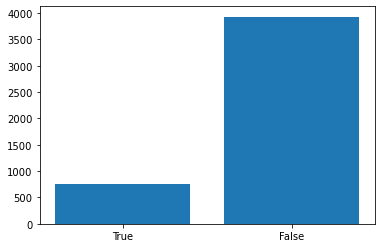

In [ ]:
import matplotlib.pyplot as plt
true_samples = np.sum(nasa['Hazardous'] == True)
false_samples = np.sum(nasa['Hazardous']==False)
plt.bar(["True","False"],height = [true_samples,false_samples])

In [ ]:
#Extracting out the True samples using boolean mask

nasa_true_mask = nasa['Hazardous'] ==True
nasa_true = nasa[nasa_true_mask]
len(nasa_true)

7109

In [ ]:
np.array(nasa).shape

(11041, 22)

In [ ]:
bootstrap = nasa_true.sample(3177,replace=True)
    
nasa = nasa.append(bootstrap)

In [ ]:
nasa.shape

(14218, 22)

In [ ]:
from sklearn.preprocessing import StandardScaler
X,y = nasa.iloc[:,0:21],nasa.iloc[:,21]

Scaler = sklearn.preprocessing.StandardScaler()
Scaler.fit(X)
X = Scaler.transform(X)

binary = sklearn.preprocessing.LabelBinarizer(pos_label=1,neg_label=0)
lb = binary.fit(y)
y = lb.transform(y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

<IPython.core.display.Javascript object>

In [ ]:
from keras.layers import Dense,Input
from keras.models import Model

def asteroid(input_shape=(21,)):

  X_input = Input(shape=input_shape)
  X = Dense(units=16,activation='relu')(X_input)
  X = Dense(units=8,activation="relu")(X)
  X = Dense(units=1,activation='sigmoid')(X)

  model = Model(inputs=X_input,outputs=X)

  return model

In [ ]:
asteroid = asteroid()

In [ ]:
import keras.backend as K
def f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val,precision,recall
def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return precision   
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return recall   

In [ ]:

asteroid.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy',f1,precision,recall])

In [ ]:
#Training Neural Network

asteroid.fit(x=x_train,y=y_train,epochs=100)

Epoch 1/100
356/356 [==============================] - 7s 5ms/step - loss: 0.4472 - accuracy: 0.8378 - f1: 0.8917 - precision: 0.8564 - recall: 0.9297
Epoch 2/100
356/356 [==============================] - 2s 5ms/step - loss: 0.1500 - accuracy: 0.9492 - f1: 0.9659 - precision: 0.9430 - recall: 0.9898
Epoch 3/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0884 - accuracy: 0.9715 - f1: 0.9808 - precision: 0.9665 - recall: 0.9954
Epoch 4/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0668 - accuracy: 0.9797 - f1: 0.9861 - precision: 0.9751 - recall: 0.9974
Epoch 5/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9839 - f1: 0.9891 - precision: 0.9797 - recall: 0.9986
Epoch 6/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0446 - accuracy: 0.9868 - f1: 0.9908 - precision: 0.9830 - recall: 0.9989
Epoch 7/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0374 - accuracy: 

356/356 [==============================] - 2s 5ms/step - loss: 0.0084 - accuracy: 0.9976 - f1: 0.9984 - precision: 0.9979 - recall: 0.9989
Epoch 55/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0029 - accuracy: 0.9992 - f1: 0.9994 - precision: 0.9991 - recall: 0.9998
Epoch 56/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0014 - accuracy: 0.9995 - f1: 0.9996 - precision: 0.9992 - recall: 1.0000
Epoch 57/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0010 - accuracy: 0.9999 - f1: 0.9999 - precision: 0.9999 - recall: 1.0000
Epoch 58/100
356/356 [==============================] - 1s 4ms/step - loss: 9.7280e-04 - accuracy: 0.9998 - f1: 0.9999 - precision: 0.9998 - recall: 1.0000
Epoch 59/100
356/356 [==============================] - 1s 4ms/step - loss: 8.6188e-04 - accuracy: 1.0000 - f1: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 60/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy

In [ ]:
y_pred = asteroid.predict(x=x_test)

89/89 [==============================] - 1s 3ms/step


In [ ]:
print(y_pred)

[[6.0137763e-21]
 [1.0000000e+00]
 [4.8886095e-27]
 ...
 [1.0000000e+00]
 [9.9996167e-01]
 [9.9934292e-01]]


<IPython.core.display.Javascript object>

[[ 792    8]
 [   0 2044]]


<AxesSubplot:>

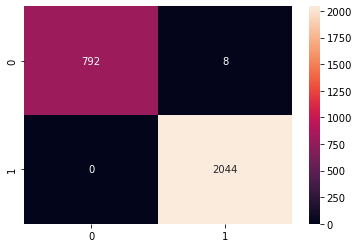

In [ ]:
for i in range(len(y_pred)):

  if (y_pred[i] >= 0.5):
    y_pred[i]=1
  else :
    y_pred[i] = 0
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(matrix)
import seaborn
seaborn.heatmap(matrix,annot=True,fmt='d')

In [ ]:
accuracy = asteroid.evaluate(x_test, y_test)

89/89 [==============================] - 1s 5ms/step - loss: 0.0131 - accuracy: 0.9972 - f1: 0.9980 - precision: 0.9961 - recall: 1.0000
